This notebook trains a nerual network and then scores it on a test set. It then does an optimisation of the inputs that give the highest activation of each neuron. It does this optimisation repeatedly using increasing values of the L1 regularisation on the inputs. This can then be plotted to see which ones are the most important features.

In [39]:
import joblib
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import energies_NN as nn
import numpy as np
from sklearn import model_selection as modsel
import pandas as pd
import seaborn as sns

In [40]:
# Loading the data
data = joblib.load("cc_kjmol_invdist.bz")
X = data["X"]
y = np.reshape(data["y"], (data["y"].shape[0],))

print(X.shape, y.shape)

(20698, 21) (20698,)


In [41]:
# Splitting the data
X_train, X_test, y_train, y_test = modsel.train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(16558, 21)


In [42]:
# Training the model
estimator = nn.Energies_NN(max_iter=20000, learning_rate_init=0.04, hidden_layer_sizes=(12,), 
                           batch_size=1000, alpha= 0.00054, alpha_l1=0.0, tensorboard=False)

In [43]:
estimator.fit(X_train, y_train)

In [44]:
estimator.scoreFull(X_test, y_test)

(0.95213359960883093,
 16.97797331706499,
 12.707280200324908,
 88.986299925949425,
 114.39093170192791)

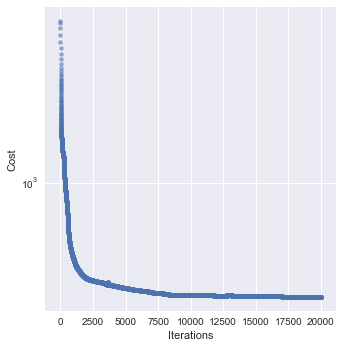

In [45]:
estimator.plot_cost()

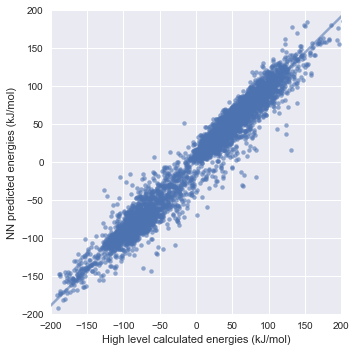

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
y_pred = estimator.predict(X_test)
df = pd.DataFrame()
df['High level calculated energies (kJ/mol)'] = y_test
df['NN predicted energies (kJ/mol)'] = y_pred
lm = sns.lmplot('High level calculated energies (kJ/mol)', 'NN predicted energies (kJ/mol)', data=df,
                scatter_kws={"s": 20, "alpha": 0.6}, line_kws={"alpha": 0.5})
lm.set(ylim=(-200,200), xlim=(-200,200))
plt.show()

In [47]:
np.random.seed(seed=1)
random_input = abs(np.random.rand(21))
alpha_l1 = [[0.0000001], [0.0000005], [0.000001], [0.00005], [0.00001], [0.0001], [0.0005], [0.001],[ 0.005], [0.01], [0.05], [0.1], [0.5], [1]]

In [48]:
all_data = []
the_mean = np.mean(X_train, axis=0)
for al in alpha_l1:
    estimator.optimise_input(random_input, al, 0, the_mean, 5000, 0.0005, with_diag=False)
    all_data.append(estimator.final_x_tot)

The activations at the end of the optimisations are:
[array([[ 0.9999907]], dtype=float32), array([[ 0.99997628]], dtype=float32), array([[ 0.99998307]], dtype=float32), array([[ 0.99996388]], dtype=float32), array([[ 0.99997854]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.999951]], dtype=float32), array([[ 0.99988067]], dtype=float32), array([[ 0.99999917]], dtype=float32), array([[ 0.99992359]], dtype=float32), array([[ 0.99996793]], dtype=float32), array([[ 0.99999285]], dtype=float32)]
The activations at the end of the optimisations are:
[array([[ 0.9999907]], dtype=float32), array([[ 0.99997616]], dtype=float32), array([[ 0.99998319]], dtype=float32), array([[ 0.99996877]], dtype=float32), array([[ 0.99997854]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.99995089]], dtype=float32), array([[ 0.99988568]], dtype=float32), array([[ 0.99999917]], dtype=float32), array([[ 0.99992537]], dtype=float32), array([[ 0.99996781]], dtype=float32), array([[ 0.9999

In [109]:
node = 11
dfc = pd.DataFrame()
alpha_l1_list = [0.0000001, 0.0000005, 0.000001, 0.00005, 0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
dfc["log_alpha"]=-np.log(alpha_l1_list)
features = []

for i in range(len(all_data[0][0])): # 0-27
    fi = []
    for j in range(len(all_data)):   # 0-5
        fi.append(all_data[j][node][i])
    features.append(fi)
    
print(len(features))
print(len(features[0]))

21
14


In [110]:
# cols = ["C1", "C1H1", "C1H2", "C1H3", "C1H4", "C1C2", "C1N", "H1", "H1H2", "H1H3", "H1H4", "H1C2", "H1N", "H2", "H2H3", "H2H4", "H2C2", "H2N", "H3", "H3H4", "H3C2", "H3N", "H4", "H4C2", "H4N", "C2", "C2N", "N"]
cols = ["C1H1", "C1H2", "C1H3", "C1H4", "C1C2", "C1N", "H1H2", "H1H3", "H1H4", "H1C2", "H1N", "H2H3", "H2H4", "H2C2", "H2N", "H3H4", "H3C2", "H3N", "H4C2", "H4N", "C2N"]
for i in range(len(features)):
    name = cols[i]
    dfc[name] = features[i]

dfc.head()

,log_alpha,C1H1,C1H2,C1H3,C1H4,C1C2,C1N,H1H2,H1H3,H1H4,...,H2H3,H2H4,H2C2,H2N,H3H4,H3C2,H3N,H4C2,H4N,C2N
0,16.118096,-0.295839,-0.044322,-0.858405,-0.682507,-0.124271,-0.080653,-0.191860,-0.122231,-0.013210,...,0.438385,-0.087782,0.295495,-0.162502,0.308207,0.229005,0.266439,-0.189806,0.071693,-0.202503
1,14.508658,-0.295657,-0.044236,-0.858405,-0.682361,-0.124188,-0.080599,-0.191763,-0.122083,-0.013126,...,0.438307,-0.087722,0.295379,-0.162427,0.308112,0.228602,0.266367,-0.189623,0.071663,-0.202422
2,13.815511,-0.295430,-0.044126,-0.858405,-0.682178,-0.124086,-0.080531,-0.191641,-0.121899,-0.013020,...,0.438218,-0.087652,0.295239,-0.162334,0.307989,0.228100,0.266280,-0.189395,0.071630,-0.202323
3,9.903488,-0.273134,-0.033438,-0.858405,-0.663973,-0.114368,-0.073901,-0.179676,-0.103680,-0.002864,...,0.429225,-0.080634,0.281560,-0.153116,0.296144,0.176698,0.257803,-0.167067,0.067072,-0.192869
4,11.512925,-0.291354,-0.042169,-0.858405,-0.678890,-0.122244,-0.079307,-0.189450,-0.118564,-0.011159,...,0.436566,-0.086372,0.292690,-0.160643,0.305791,0.218960,0.264705,-0.185273,0.070947,-0.200567


In [111]:
# filename = "l1_scan_" + str(node) + "_seed_"+ str(2) + ".csv"
# dfc.to_csv(filename)

In [112]:
# node = 7
# dfc = pd.read_csv("l1_scan_7.csv", index_col=0)
# dfc.head()

In [113]:
df_melt = dfc.melt('log_alpha', var_name='cols',  value_name='vals')

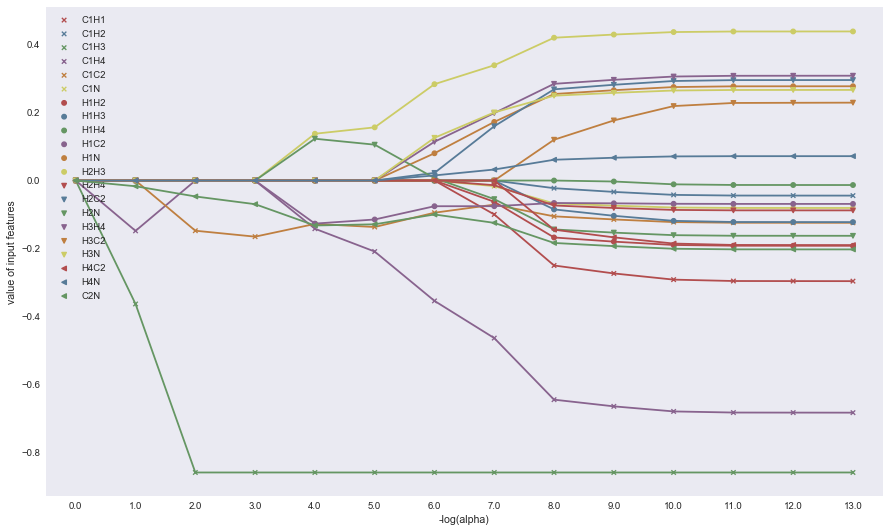

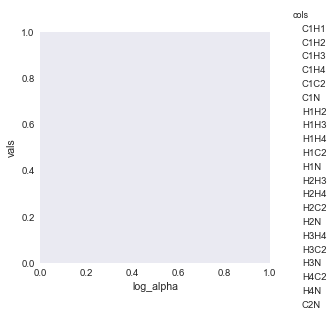

In [114]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

sns.set_style("darkgrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.2 , rc={"lines.linewidth": 1})

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)


markers = ['x','x','x','x','x','x','o','o','o','o','o','o','v','v','v','v','v','v','<','<','<','<','<','<','s','s','s','s']
line_style = ["-","-","-","-","-","-","-","-","-",":",":",":",":",":",":",":",":",":","--","--","--","--","--","--","--","--","--","--"]
the_plot = sns.factorplot(x="log_alpha", y="vals", hue='cols', data=df_melt, ax=ax, palette=sns.color_palette("Set1", desat=0.5),  markers=markers)
ax.set(xlabel='-log(alpha)', ylabel='value of input features')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.legend(loc='upper left')
# ax.set_ylim((-0.01,0.2))
name = "node" + str(node) + ".png"
fig.savefig(name, transparent=False, dpi=100)


plt.show()